In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Jan Schoonbrood\\Homework\\project-rws\\code'

## Inlezen dataset, data bekijken en voorbewerken

In [3]:
#Inlezen dataset
df = pd.read_csv('../data/data_gefilterd(NIET_AANPASSEN).csv', index_col='Unnamed: 0')

C:\Anaconda\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

knmi_station       datum   locatie parameter rapportage_grens  meetwaarde  \
1           NaN  2006-01-05  WALCRN70  s_NO3NO2              NaN       0.089   
2           NaN  2006-01-05  WALCRN70       NO2              NaN       0.008   
3           NaN  2006-01-05  WALCRN70       NH4                <       0.002   
4           NaN  2006-01-05  WALCRN70       PO4              NaN       0.026   
5           NaN  2006-01-05  WALCRN70      SiO2              NaN       0.123   

   kwaliteits_keurmerk eenheid hoedanigheid analyse_methode  \
1                    0    mg/l          Nnf            A090   
2                    0    mg/l          Nnf            A090   
3                    0    mg/l          Nnf            A090   
4                    0    mg/l          Pnf            A090   
5                    0    mg/l         Sinf            A090   

                     ...                     knmi_datum  \
1                    ...                            NaN   
2                    ...                            NaN   
3                    ...                            NaN   
4                    ...                            NaN   
5                    ...                            NaN   

  vector_mean_wind_direction_in_degrees vector_mean_windspeed   \
1                                   NaN                    NaN   
2                                   NaN                    NaN   
3                                   NaN                    NaN   
4                                   NaN                    NaN   
5                                   NaN                    NaN   

  daily_mean_windspeed maximum_hourly_mean_windspeed daily_mean_temperature  \
1                  NaN                           NaN                    NaN   
2                  NaN                           NaN                    NaN   
3                  NaN                           NaN                    NaN   
4                  NaN                           NaN                    NaN   
5                  NaN                           NaN                    NaN   

   daily_precipitation_amount  daily_mean_sea_level_pressure  \
1                         NaN                            NaN   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   
5                         NaN                            NaN   

   mean_daily_cloud_cover  daily_mean_relative_atmospheric_humidity  
1                     NaN                                       NaN  
2                     NaN                                       NaN  
3                     NaN                                       NaN  
4                     NaN                                       NaN  
5                     NaN                                       NaN  

[5 rows x 49 columns]

In [5]:
#Kolommen die (mogelijk) van nut zijn extraheren.
df1 = df[['locatie', 'compartiments_code', 'locatie_coordinaten_soort', 'locatie_X', 'locatie_Y', 'plt_X', 'plt_Y', 'locatie_omschrijving', 'compartiments_code_omschrijving', 'gebieds_code_omschrijving', 'X_RD', 'Y_RD', 'X_WGS', 'Y_WGS']]

In [6]:
df1.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1  WALCRN70                  10                       E50    2404500   
2  WALCRN70                  10                       E50    2404500   
3  WALCRN70                  10                       E50    2404500   
4  WALCRN70                  10                       E50    2404500   
5  WALCRN70                  10                       E50    2404500   

   locatie_Y    plt_X     plt_Y         locatie_omschrijving  \
1   51572500  2404500  51572500  Walcheren 70 km uit de kust   
2   51572500  2404500  51572500  Walcheren 70 km uit de kust   
3   51572500  2404500  51572500  Walcheren 70 km uit de kust   
4   51572500  2404500  51572500  Walcheren 70 km uit de kust   
5   51572500  2404500  51572500  Walcheren 70 km uit de kust   

  compartiments_code_omschrijving                 gebieds_code_omschrijving  \
1                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
2                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
3                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
4                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
5                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   

      X_RD      Y_RD  X_WGS  Y_WGS  
1 -31122.0  444308.0    NaN    NaN  
2 -31122.0  444308.0    NaN    NaN  
3 -31122.0  444308.0    NaN    NaN  
4 -31122.0  444308.0    NaN    NaN  
5 -31122.0  444308.0    NaN    NaN

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345295 entries, 1 to 2345295
Data columns (total 14 columns):
locatie                            object
compartiments_code                 int64
locatie_coordinaten_soort          object
locatie_X                          int64
locatie_Y                          int64
plt_X                              int64
plt_Y                              int64
locatie_omschrijving               object
compartiments_code_omschrijving    object
gebieds_code_omschrijving          object
X_RD                               float64
Y_RD                               float64
X_WGS                              float64
Y_WGS                              float64
dtypes: float64(4), int64(5), object(5)
memory usage: 268.4+ MB


In [8]:
#Aantal unieke locaties
locatie = df1['locatie'].unique()

In [9]:
len(locatie)

115

In [10]:
#Wat zijn de coordinaten soorten?
coor_soort = df1['locatie_coordinaten_soort'].unique()

In [11]:
print(coor_soort)

['E50' 'RD']


#### RD = EPSG:28992, e50 = mogelijk EPSG:4230. De kolommen WGS bevatten epsg:4326 coordinaten

## Groupby uitvoeren om locaties en de coordinaten te bekijken

In [12]:
#Een groupby maken van de locaties
group1 = df1.groupby(['gebieds_code_omschrijving', 'locatie_coordinaten_soort', 'locatie_omschrijving']).mean()

In [13]:
group1

compartiments_code  \
gebieds_code_omschrijving                locatie_coordinaten_soort locatie_omschrijving                                             
Amsterdam-Rijnkanaal                     RD                        Nieuwersluis                                         10.131048   
Bergsche Maas                            RD                        Heusden Bernse Veer                                  10.000000   
                                                                   Keizersveer                                          19.462758   
Breeveertien  (Zuidelijke Noordzee, NCP) E50                       Noordwijk 70 km uit de kust                          13.268122   
                                                                   Walcheren 70 km uit de kust                          14.894783   
Calandkanaal                             RD                        Beerkanaal midden                                    10.000000   
Doggersbank  (Centrale Noordzee, NCP)    E50                       Terschelling 235 km uit de kust                      12.334193   
Drontermeer  (randmeer)                  RD                        Drontermeerdijk, kilometer 0.4                       23.704819   
                                                                   Reve                                                 22.648276   
Eemmeer  (randmeer)                      RD                        Eemmeerdijk, kilometer 23                            13.385375   
Eems-Dollard                             RD                        Bocht van Watum                                      16.530158   
                                                                   Bocht van Watum noord                                12.580340   
                                                                   Groote Gat noord                                     13.738009   
                                                                   Huibertgat oost                                      11.309208   
Friese Front  (Centrale Noordzee, NCP)   E50                       Terschelling 50 km uit de kust                       15.752259   
German Bight  (zeegebied)                E50                       Rottumerplaat 50 km uit de kust                      10.746572   
                                                                   Rottumerplaat 70 km uit de kust                      16.064276   
Gooimeer  (randmeer)                     RD                        Gooimeer midden                                      21.696203   
Grevelingenmeer                          RD                        Dreischor                                            11.272188   
                                                                   Herkingen                                            15.111596   
                                                                   Scharendijke diepe put                               14.597673   
Haringvliet                              RD                        Haringvlietsluis                                     21.967923   
                                                                   Scheelhoek                                           10.000000   
Hollandsche IJssel                       RD                        Gouda voorhaven                                      23.109031   
Hollandse Diep                           RD                        Bovensluis                                           18.231681   
                                                                   Hollandsch Diep (mond Dordtsche Kil west)            10.000000   
Hollandse kust  (Kustzone, NCP)          E50                       Noordwijk 10 km uit de kust                          11.413153   
                                                                   Noordwijk 2 km uit de kust                           15.883435   
                                                                   Noordwijk 20 km uit de kust                          1

In [14]:
#Enkele locaties hebben geen epsg:4326 coordinaten
group1.isnull().any()

compartiments_code    False
locatie_X             False
locatie_Y             False
plt_X                 False
plt_Y                 False
X_RD                   True
Y_RD                   True
X_WGS                  True
Y_WGS                  True
dtype: bool

## Alle rijen zonder epsg:4326 uit de dataframe halen en in e50 en RD dataframes zetten

In [15]:
#Alle E50 coordinaten zonder EPSG;4326
dfe50 = df1.loc[df1['locatie_coordinaten_soort'] == 'E50' ]
dfe50 = dfe50[dfe50['X_WGS'].isnull()]

In [16]:
dfe50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5064 entries, 1 to 8583
Data columns (total 14 columns):
locatie                            5064 non-null object
compartiments_code                 5064 non-null int64
locatie_coordinaten_soort          5064 non-null object
locatie_X                          5064 non-null int64
locatie_Y                          5064 non-null int64
plt_X                              5064 non-null int64
plt_Y                              5064 non-null int64
locatie_omschrijving               5064 non-null object
compartiments_code_omschrijving    5064 non-null object
gebieds_code_omschrijving          5064 non-null object
X_RD                               4562 non-null float64
Y_RD                               4562 non-null float64
X_WGS                              0 non-null float64
Y_WGS                              0 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 593.4+ KB


In [17]:
#Unieke locaties met alleen e50 coordinaten.
dfe50.groupby(['gebieds_code_omschrijving', 'locatie_omschrijving']).mean()

compartiments_code  \
gebieds_code_omschrijving                locatie_omschrijving                                
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust             14.894783   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust           10.000000   

                                                                        locatie_X  \
gebieds_code_omschrijving                locatie_omschrijving                       
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust    2404500.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust  5090200.0   

                                                                         locatie_Y  \
gebieds_code_omschrijving                locatie_omschrijving                        
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust    51572500.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust  53245500.0   

                                                                            plt_X  \
gebieds_code_omschrijving                locatie_omschrijving                       
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust    2404500.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust  5090200.0   

                                                                             plt_Y  \
gebieds_code_omschrijving                locatie_omschrijving                        
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust    51572500.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust  53245500.0   

                                                                           X_RD  \
gebieds_code_omschrijving                locatie_omschrijving                     
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust   -31122.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust      NaN   

                                                                            Y_RD  \
gebieds_code_omschrijving                locatie_omschrijving                      
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust    444308.0   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust       NaN   

                                                                        X_WGS  \
gebieds_code_omschrijving                locatie_omschrijving                   
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust      NaN   
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust    NaN   

                                                                        Y_WGS  
gebieds_code_omschrijving                locatie_omschrijving                  
Breeveertien  (Zuidelijke Noordzee, NCP) Walcheren 70 km uit de kust      NaN  
Waddenkust  (Kustzone, NCP)              Terschelling 4 km uit de kust    NaN

In [18]:
#Alle rijksdriehoek coordinaten zonder EPSG;4326
dfrd = df1.loc[df1['locatie_coordinaten_soort'] == 'RD' ]
dfrd = dfrd[dfrd['X_WGS'].isnull()]

In [19]:
dfrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 217 to 8608
Data columns (total 14 columns):
locatie                            3544 non-null object
compartiments_code                 3544 non-null int64
locatie_coordinaten_soort          3544 non-null object
locatie_X                          3544 non-null int64
locatie_Y                          3544 non-null int64
plt_X                              3544 non-null int64
plt_Y                              3544 non-null int64
locatie_omschrijving               3544 non-null object
compartiments_code_omschrijving    3544 non-null object
gebieds_code_omschrijving          3544 non-null object
X_RD                               0 non-null float64
Y_RD                               0 non-null float64
X_WGS                              0 non-null float64
Y_WGS                              0 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 415.3+ KB


In [20]:
#Unieke locaties met alleen RD coordinaten
dfrd.groupby(['gebieds_code_omschrijving', 'locatie_omschrijving']).mean()

compartiments_code  \
gebieds_code_omschrijving  locatie_omschrijving                                            
Bergsche Maas              Heusden Bernse Veer                                 10.000000   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4                      23.704819   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)           10.000000   
Voordelta  (Kustzone, NCP) Domburg badstrand                                   10.000000   
                           Ouddorp badstrand                                   10.000000   

                                                                       locatie_X  \
gebieds_code_omschrijving  locatie_omschrijving                                    
Bergsche Maas              Heusden Bernse Veer                        13952900.0   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4             18681400.0   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)  10102500.0   
Voordelta  (Kustzone, NCP) Domburg badstrand                           2226100.0   
                           Ouddorp badstrand                           5430000.0   

                                                                       locatie_Y  \
gebieds_code_omschrijving  locatie_omschrijving                                    
Bergsche Maas              Heusden Bernse Veer                        41726300.0   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4             50605200.0   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)  41395300.0   
Voordelta  (Kustzone, NCP) Domburg badstrand                          39817000.0   
                           Ouddorp badstrand                          42785000.0   

                                                                           plt_X  \
gebieds_code_omschrijving  locatie_omschrijving                                    
Bergsche Maas              Heusden Bernse Veer                        13952900.0   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4             18681400.0   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)  10102500.0   
Voordelta  (Kustzone, NCP) Domburg badstrand                           2226100.0   
                           Ouddorp badstrand                           5430000.0   

                                                                           plt_Y  \
gebieds_code_omschrijving  locatie_omschrijving                                    
Bergsche Maas              Heusden Bernse Veer                        41726300.0   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4             50605200.0   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)  41395300.0   
Voordelta  (Kustzone, NCP) Domburg badstrand                          39817000.0   
                           Ouddorp badstrand                          42785000.0   

                                                                      X_RD  \
gebieds_code_omschrijving  locatie_omschrijving                              
Bergsche Maas              Heusden Bernse Veer                         NaN   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4              NaN   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)   NaN   
Voordelta  (Kustzone, NCP) Domburg badstrand                           NaN   
                           Ouddorp badstrand                           NaN   

                                                                      Y_RD  \
gebieds_code_omschrijving  locatie_omschrijving                              
Bergsche Maas              Heusden Bernse Veer                         NaN   
Drontermeer  (randmeer)    Drontermeerdijk, kilometer 0.4              NaN   
Hollandse Diep             Hollandsch Diep (mond Dordtsche Kil west)   NaN   
Voordelta  (Kustzone, NCP) Domburg badstrand                           NaN   
                           Ouddorp badstrand          

### Kolommen 'compartiment' en 'gebied' bekijken

In [21]:
compartiment = df1['compartiments_code_omschrijving'].unique()

In [22]:
#Compartiment: Oppervlaktewater en lucht zijn duidelijk, maar de vraag is wat zwevende stof is.
print(compartiment)

['Oppervlaktewater' 'Lucht' 'Zwevende stof']


In [23]:
gebied = df1['gebieds_code_omschrijving'].unique()

In [24]:
len(gebied)

51

In [25]:
print(gebied)

['Breeveertien  (Zuidelijke Noordzee, NCP)' 'Waddenkust  (Kustzone, NCP)'
 'Voordelta  (Kustzone, NCP)' 'Hollandse Diep' 'Bergsche Maas'
 'Drontermeer  (randmeer)' 'Hollandse kust  (Kustzone, NCP)'
 'Waddenzee west' 'Noordzeekanaal'
 'Friese Front  (Centrale Noordzee, NCP)'
 'Doggersbank  (Centrale Noordzee, NCP)'
 'Oestergronden  (Centrale Noordzee, NCP)' 'Markermeer'
 'Terschelling  (kustvak)' 'IJsselmeer' 'Amsterdam-Rijnkanaal' 'Lekkanaal'
 'IJmeer' 'Lek' 'Eemmeer  (randmeer)' 'Gooimeer  (randmeer)'
 'Wolderwijd  (randmeer)' 'Veluwemeer  (randmeer)' 'Ketelmeer'
 'Nuldernauw  (randmeer)' 'Waddenzee oost' 'Zwarte Water' 'IJssel'
 'Vossemeer  (randmeer)' 'Zwarte Meer' 'Rijn / Bovenrijn'
 'German Bight  (zeegebied)' 'Twente kanaal' 'Eems-Dollard'
 'Westerschelde' 'Kanaal van Gent naar Terneuzen' 'Grevelingenmeer'
 'Veerse meer' 'Oosterschelde' 'Haringvliet' 'Nieuwe Waterweg'
 'Calandkanaal' 'Volkerak / Zoommeer' 'Schelde (Belgie)' 'Oude Maas'
 'Nieuwe Maas' 'Hollandsche IJssel' 'Waal'
 

## Standaard geopandas dataset in laden voor plotten en vergelijken

In [26]:
#Dataset inladen die eerder is gebruikt om te plotten.
gdf_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [27]:
gdf_cities.head()

name                                     geometry
0  Vatican City  POINT (12.45338654497177 41.90328217996012)
1    San Marino    POINT (12.44177015780014 43.936095834768)
2         Vaduz  POINT (9.516669472907267 47.13372377429357)
3    Luxembourg  POINT (6.130002806227083 49.61166037912108)
4       Palikir  POINT (158.1499743237623 6.916643696007725)

In [28]:
gdf_cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
name        202 non-null object
geometry    202 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [29]:
#De geometry kolom heeft coordinaten die overeenkomen met WGS kolommen van rijkswaterstaat dataset. Die kunnen dus gebruikt worden.
gdf_cities.loc[gdf_cities['name'] == 'Amsterdam']

name                                     geometry
172  Amsterdam  POINT (4.914694317400972 52.35191454666443)

In [30]:
df2 = df1.drop_duplicates(subset='locatie', keep='first', inplace=False)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1 to 2303395
Data columns (total 14 columns):
locatie                            115 non-null object
compartiments_code                 115 non-null int64
locatie_coordinaten_soort          115 non-null object
locatie_X                          115 non-null int64
locatie_Y                          115 non-null int64
plt_X                              115 non-null int64
plt_Y                              115 non-null int64
locatie_omschrijving               115 non-null object
compartiments_code_omschrijving    115 non-null object
gebieds_code_omschrijving          115 non-null object
X_RD                               109 non-null float64
Y_RD                               109 non-null float64
X_WGS                              108 non-null float64
Y_WGS                              108 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 13.5+ KB


In [32]:
df2.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1        WALCRN70                  10                       E50    2404500   
24        TERSLG4                  10                       E50    5090200   
217       OUDDBSD                  10                        RD    5430000   
246       DOMBBSD                  10                        RD    2226100   
2105  HOLLDMDSKWT                  10                        RD   10102500   

      locatie_Y     plt_X     plt_Y  \
1      51572500   2404500  51572500   
24     53245500   5090200  53245500   
217    42785000   5430000  42785000   
246    39817000   2226100  39817000   
2105   41395300  10102500  41395300   

                           locatie_omschrijving  \
1                   Walcheren 70 km uit de kust   
24                Terschelling 4 km uit de kust   
217                           Ouddorp badstrand   
246                           Domburg badstrand   
2105  Hollandsch Diep (mond Dordtsche Kil west)   

     compartiments_code_omschrijving  \
1                   Oppervlaktewater   
24                  Oppervlaktewater   
217                 Oppervlaktewater   
246                 Oppervlaktewater   
2105                Oppervlaktewater   

                     gebieds_code_omschrijving     X_RD      Y_RD  X_WGS  \
1     Breeveertien  (Zuidelijke Noordzee, NCP) -31122.0  444308.0    NaN   
24                 Waddenkust  (Kustzone, NCP)      NaN       NaN    NaN   
217                 Voordelta  (Kustzone, NCP)      NaN       NaN    NaN   
246                 Voordelta  (Kustzone, NCP)      NaN       NaN    NaN   
2105                            Hollandse Diep      NaN       NaN    NaN   

      Y_WGS  
1       NaN  
24      NaN  
217     NaN  
246     NaN  
2105    NaN

## Dataframe met epsg 4326 coordinaten omzetten naar geodataframe en plotten

In [33]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [34]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df2['X_WGS'], df2['Y_WGS'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)

In [35]:
gdf.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1        WALCRN70                  10                       E50    2404500   
24        TERSLG4                  10                       E50    5090200   
217       OUDDBSD                  10                        RD    5430000   
246       DOMBBSD                  10                        RD    2226100   
2105  HOLLDMDSKWT                  10                        RD   10102500   

      locatie_Y     plt_X     plt_Y  \
1      51572500   2404500  51572500   
24     53245500   5090200  53245500   
217    42785000   5430000  42785000   
246    39817000   2226100  39817000   
2105   41395300  10102500  41395300   

                           locatie_omschrijving  \
1                   Walcheren 70 km uit de kust   
24                Terschelling 4 km uit de kust   
217                           Ouddorp badstrand   
246                           Domburg badstrand   
2105  Hollandsch Diep (mond Dordtsche Kil west)   

     compartiments_code_omschrijving  \
1                   Oppervlaktewater   
24                  Oppervlaktewater   
217                 Oppervlaktewater   
246                 Oppervlaktewater   
2105                Oppervlaktewater   

                     gebieds_code_omschrijving     X_RD      Y_RD  X_WGS  \
1     Breeveertien  (Zuidelijke Noordzee, NCP) -31122.0  444308.0    NaN   
24                 Waddenkust  (Kustzone, NCP)      NaN       NaN    NaN   
217                 Voordelta  (Kustzone, NCP)      NaN       NaN    NaN   
246                 Voordelta  (Kustzone, NCP)      NaN       NaN    NaN   
2105                            Hollandse Diep      NaN       NaN    NaN   

      Y_WGS         geometry  
1       NaN  POINT (nan nan)  
24      NaN  POINT (nan nan)  
217     NaN  POINT (nan nan)  
246     NaN  POINT (nan nan)  
2105    NaN  POINT (nan nan)

In [36]:
gdf = gdf.dropna(subset=['X_WGS'])

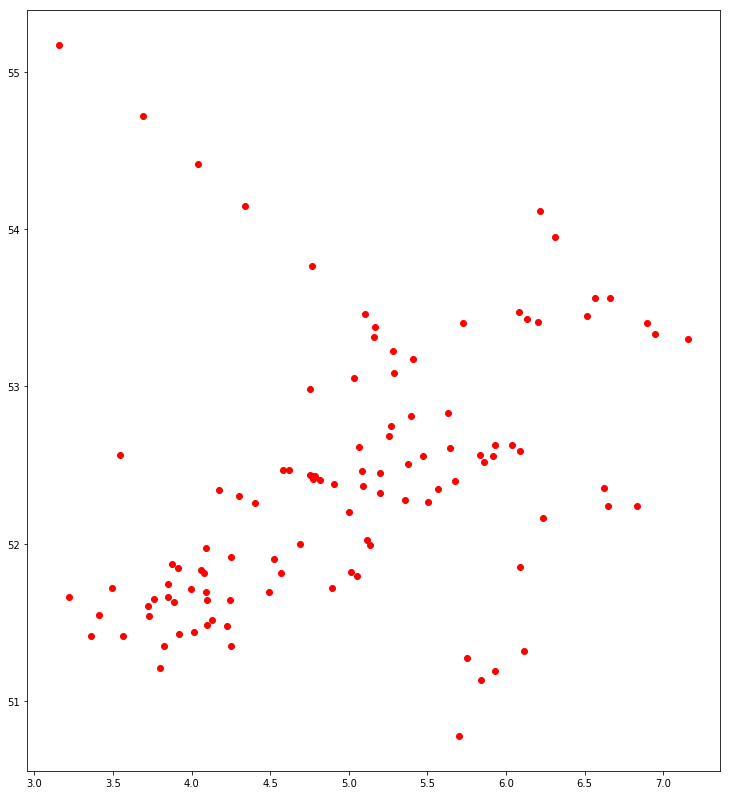

In [37]:
#Plotten
fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
gdf.plot(color='red', ax=ax, legend=False)

In [38]:
import mplleaflet

In [39]:
fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
gdf.plot(color='red', ax=ax, legend=False)
mplleaflet.display(fig=fig)

In [40]:
gdf_countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

(50, 57)

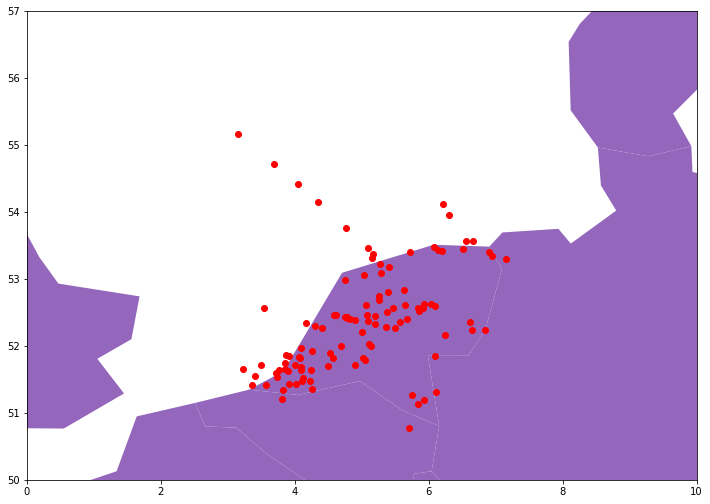

In [41]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
gdf_countries.plot(ax=ax, column='continent')
# Add locations
gdf.plot(ax=ax, color='red', legend=True)
plt.xlim(0, 10)
plt.ylim(50, 57)
#gdf.apply(lambda x: ax.annotate(s=locatie, xy=geometry, ha='center'),axis=1);

## Dataframe met RD coordinaten omzetten naar geodataframe, omzetten naar epsg 4326 en plotten

In [42]:
geord = dfrd.drop_duplicates(subset='locatie', keep='first', inplace=False)

In [43]:
geord.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
217       OUDDBSD                  10                        RD    5430000   
246       DOMBBSD                  10                        RD    2226100   
2105  HOLLDMDSKWT                  10                        RD   10102500   
3356    HEUSDBSVR                  10                        RD   13952900   
7174  DRONTMDK0.4                  10                        RD   18681400   

      locatie_Y     plt_X     plt_Y  \
217    42785000   5430000  42785000   
246    39817000   2226100  39817000   
2105   41395300  10102500  41395300   
3356   41726300  13952900  41726300   
7174   50605200  18681400  50605200   

                           locatie_omschrijving  \
217                           Ouddorp badstrand   
246                           Domburg badstrand   
2105  Hollandsch Diep (mond Dordtsche Kil west)   
3356                        Heusden Bernse Veer   
7174             Drontermeerdijk, kilometer 0.4   

     compartiments_code_omschrijving   gebieds_code_omschrijving  X_RD  Y_RD  \
217                 Oppervlaktewater  Voordelta  (Kustzone, NCP)   NaN   NaN   
246                 Oppervlaktewater  Voordelta  (Kustzone, NCP)   NaN   NaN   
2105                Oppervlaktewater              Hollandse Diep   NaN   NaN   
3356                Oppervlaktewater               Bergsche Maas   NaN   NaN   
7174                Oppervlaktewater     Drontermeer  (randmeer)   NaN   NaN   

      X_WGS  Y_WGS  
217     NaN    NaN  
246     NaN    NaN  
2105    NaN    NaN  
3356    NaN    NaN  
7174    NaN    NaN

In [44]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geord['locatie_X']/100, geord['locatie_Y']/100)]

# Coordinate reference system : RD
crs = '+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.417,50.3319,465.552,-0.398957,0.343988,-1.8774,4.0725 +units=m +no_defs'
#crs = '+proj=longlat +ellps=intl +towgs84=-87,-98,-121,0,0,0,0 +no_defs '

# Creating a Geographic data frame 
gdf_rd = gpd.GeoDataFrame(geord, crs=crs, geometry=geometry)

In [45]:
gdf_rd.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
217       OUDDBSD                  10                        RD    5430000   
246       DOMBBSD                  10                        RD    2226100   
2105  HOLLDMDSKWT                  10                        RD   10102500   
3356    HEUSDBSVR                  10                        RD   13952900   
7174  DRONTMDK0.4                  10                        RD   18681400   

      locatie_Y     plt_X     plt_Y  \
217    42785000   5430000  42785000   
246    39817000   2226100  39817000   
2105   41395300  10102500  41395300   
3356   41726300  13952900  41726300   
7174   50605200  18681400  50605200   

                           locatie_omschrijving  \
217                           Ouddorp badstrand   
246                           Domburg badstrand   
2105  Hollandsch Diep (mond Dordtsche Kil west)   
3356                        Heusden Bernse Veer   
7174             Drontermeerdijk, kilometer 0.4   

     compartiments_code_omschrijving   gebieds_code_omschrijving  X_RD  Y_RD  \
217                 Oppervlaktewater  Voordelta  (Kustzone, NCP)   NaN   NaN   
246                 Oppervlaktewater  Voordelta  (Kustzone, NCP)   NaN   NaN   
2105                Oppervlaktewater              Hollandse Diep   NaN   NaN   
3356                Oppervlaktewater               Bergsche Maas   NaN   NaN   
7174                Oppervlaktewater     Drontermeer  (randmeer)   NaN   NaN   

      X_WGS  Y_WGS               geometry  
217     NaN    NaN   POINT (54300 427850)  
246     NaN    NaN   POINT (22261 398170)  
2105    NaN    NaN  POINT (101025 413953)  
3356    NaN    NaN  POINT (139529 417263)  
7174    NaN    NaN  POINT (186814 506052)

In [46]:
gdf_rd.crs

'+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.417,50.3319,465.552,-0.398957,0.343988,-1.8774,4.0725 +units=m +no_defs'

In [47]:
gdf_rd = gdf_rd.to_crs({'init' : 'epsg:4326'})

In [48]:
gdf_rd.crs

{'init': 'epsg:4326'}

(50, 57)

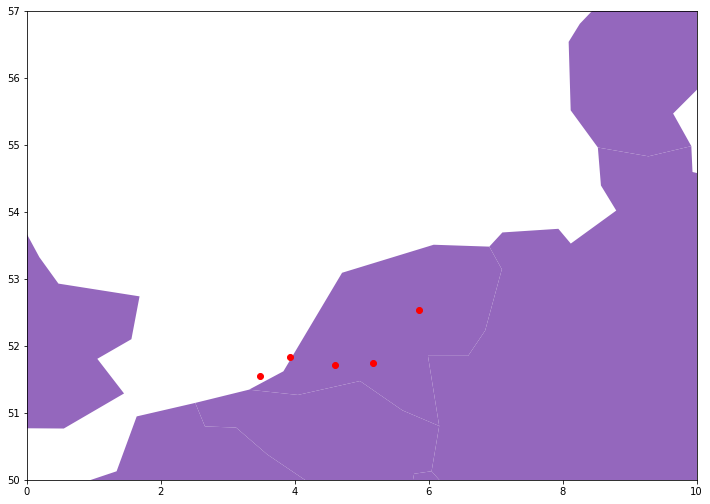

In [49]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
gdf_countries.plot(ax=ax, column='continent')
# Add locations
gdf_rd.plot(ax=ax, color='red', legend=True)
plt.xlim(0, 10)
plt.ylim(50, 57)

## Dataframe met e50 coordinaten omzetten naar geodataframe, omzetten naar epsg 4326 en plotten

In [50]:
geoe50 = dfe50.drop_duplicates(subset='locatie', keep='first', inplace=False)

In [51]:
geoe50.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1   WALCRN70                  10                       E50    2404500   
24   TERSLG4                  10                       E50    5090200   

    locatie_Y    plt_X     plt_Y           locatie_omschrijving  \
1    51572500  2404500  51572500    Walcheren 70 km uit de kust   
24   53245500  5090200  53245500  Terschelling 4 km uit de kust   

   compartiments_code_omschrijving                 gebieds_code_omschrijving  \
1                 Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
24                Oppervlaktewater               Waddenkust  (Kustzone, NCP)   

       X_RD      Y_RD  X_WGS  Y_WGS  
1  -31122.0  444308.0    NaN    NaN  
24      NaN       NaN    NaN    NaN

### e50 kan niet worden geplot locatie WALCRN70 heeft RD coordinaten, die gebruiken en locatie TERSLG4 weggooien

In [52]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geoe50['X_RD'], geoe50['Y_RD'])]

# Coordinate reference system : RD
crs = '+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.417,50.3319,465.552,-0.398957,0.343988,-1.8774,4.0725 +units=m +no_defs'
#crs = '+proj=longlat +ellps=intl +towgs84=-87,-98,-121,0,0,0,0 +no_defs '

# Creating a Geographic data frame 
gdf_e50 = gpd.GeoDataFrame(geoe50, crs=crs, geometry=geometry)

In [53]:
gdf_e50.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1   WALCRN70                  10                       E50    2404500   
24   TERSLG4                  10                       E50    5090200   

    locatie_Y    plt_X     plt_Y           locatie_omschrijving  \
1    51572500  2404500  51572500    Walcheren 70 km uit de kust   
24   53245500  5090200  53245500  Terschelling 4 km uit de kust   

   compartiments_code_omschrijving                 gebieds_code_omschrijving  \
1                 Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   
24                Oppervlaktewater               Waddenkust  (Kustzone, NCP)   

       X_RD      Y_RD  X_WGS  Y_WGS               geometry  
1  -31122.0  444308.0    NaN    NaN  POINT (-31122 444308)  
24      NaN       NaN    NaN    NaN        POINT (nan nan)

In [54]:
gdf_e50.crs

'+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.417,50.3319,465.552,-0.398957,0.343988,-1.8774,4.0725 +units=m +no_defs'

In [55]:
gdf_e50 = gdf_e50.drop([24])

In [56]:
gdf_e50 = gdf_e50.to_crs({'init' : 'epsg:4326'})

(50, 57)

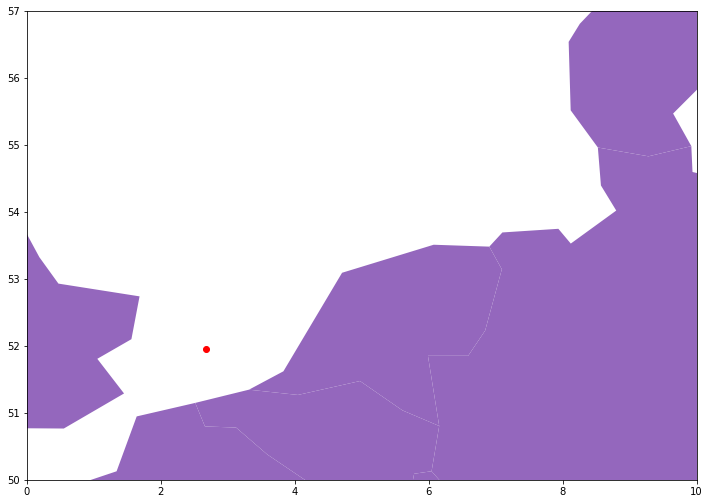

In [57]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
gdf_countries.plot(ax=ax, column='continent')
# Add locations
gdf_e50.plot(ax=ax, color='red', legend=True)
plt.xlim(0, 10)
plt.ylim(50, 57)

In [58]:
gdf_e50

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
1  WALCRN70                  10                       E50    2404500   

   locatie_Y    plt_X     plt_Y         locatie_omschrijving  \
1   51572500  2404500  51572500  Walcheren 70 km uit de kust   

  compartiments_code_omschrijving                 gebieds_code_omschrijving  \
1                Oppervlaktewater  Breeveertien  (Zuidelijke Noordzee, NCP)   

      X_RD      Y_RD  X_WGS  Y_WGS                                   geometry  
1 -31122.0  444308.0    NaN    NaN  POINT (2.67912079069638 51.9559878302004)

## Geodataframes samenvoegen

In [59]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 108 entries, 8609 to 2303395
Data columns (total 15 columns):
locatie                            108 non-null object
compartiments_code                 108 non-null int64
locatie_coordinaten_soort          108 non-null object
locatie_X                          108 non-null int64
locatie_Y                          108 non-null int64
plt_X                              108 non-null int64
plt_Y                              108 non-null int64
locatie_omschrijving               108 non-null object
compartiments_code_omschrijving    108 non-null object
gebieds_code_omschrijving          108 non-null object
X_RD                               108 non-null float64
Y_RD                               108 non-null float64
X_WGS                              108 non-null float64
Y_WGS                              108 non-null float64
geometry                           108 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 13

In [60]:
gdf_rd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5 entries, 217 to 7174
Data columns (total 15 columns):
locatie                            5 non-null object
compartiments_code                 5 non-null int64
locatie_coordinaten_soort          5 non-null object
locatie_X                          5 non-null int64
locatie_Y                          5 non-null int64
plt_X                              5 non-null int64
plt_Y                              5 non-null int64
locatie_omschrijving               5 non-null object
compartiments_code_omschrijving    5 non-null object
gebieds_code_omschrijving          5 non-null object
X_RD                               0 non-null float64
Y_RD                               0 non-null float64
X_WGS                              0 non-null float64
Y_WGS                              0 non-null float64
geometry                           5 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 640.0+ bytes


In [61]:
all_locations = pd.concat([gdf, gdf_rd])

In [62]:
all_locations = pd.concat([all_locations, gdf_e50])

In [63]:
all_locations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 114 entries, 8609 to 1
Data columns (total 15 columns):
locatie                            114 non-null object
compartiments_code                 114 non-null int64
locatie_coordinaten_soort          114 non-null object
locatie_X                          114 non-null int64
locatie_Y                          114 non-null int64
plt_X                              114 non-null int64
plt_Y                              114 non-null int64
locatie_omschrijving               114 non-null object
compartiments_code_omschrijving    114 non-null object
gebieds_code_omschrijving          114 non-null object
X_RD                               109 non-null float64
Y_RD                               109 non-null float64
X_WGS                              108 non-null float64
Y_WGS                              108 non-null float64
geometry                           114 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 14.2+ KB

In [64]:
all_locations.head(10)

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
8609    NOORDWK20                  10                       E50    4103000   
8625    NOORDWK10                  10                       E50    4180900   
8641     NOORDWK2                  10                       E50    4242200   
75226    BUITHVN8                  10                        RD   10020600   
81227     MARSDND                  10                        RD   11220000   
88888       AMSDM                  50                        RD   12221600   
96275      WESTZN                  10                        RD   11263000   
105821   AMRKHVN2                  10                        RD   11333000   
106008   WESTHVN2                  10                        RD   11636900   
106231   ZIJKNLD1                  10                        RD   11176200   

        locatie_Y     plt_X     plt_Y                locatie_omschrijving  \
8609     52203000   4103000  52203000         Noordwijk 20 km uit de kust   
8625     52180800   4180900  52180800         Noordwijk 10 km uit de kust   
8641     52154100   4242200  52154100          Noordwijk 2 km uit de kust   
75226    49814300  10020600  49814300                       Buitenhaven 8   
81227    55525000  11220000  55525000                      Marsdiep noord   
88888    48821000  12221600  48821000  Amsterdam (kilometer 25, IJtunnel)   
96275    49351800  11263000  49351800             Westzaan (kilometer 13)   
105821   49175000  11333000  49175000                      Amerikahaven-2   
106008   49081500  11636900  49081500                         Westhaven-2   
106231   49414900  11176200  49414900                       Zijkanaal D-1   

       compartiments_code_omschrijving        gebieds_code_omschrijving  \
8609                  Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8625                  Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8641                  Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
75226                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
81227                 Oppervlaktewater                   Waddenzee west   
88888                    Zwevende stof                   Noordzeekanaal   
96275                 Oppervlaktewater                   Noordzeekanaal   
105821                Oppervlaktewater                   Noordzeekanaal   
106008                Oppervlaktewater                   Noordzeekanaal   
106231                Oppervlaktewater                   Noordzeekanaal   

            X_RD      Y_RD     X_WGS     Y_WGS  \
8609     72374.0  484329.0  4.174743  52.34066   
8625     80995.0  479803.0  4.302219  52.30122   
8641     88000.0  475160.0  4.405826  52.26039   
75226   100206.0  498143.0  4.580848  52.46828   
81227   112200.0  555250.0  4.749934  52.98254   
88888   122216.0  488210.0  4.905707  52.38077   
96275   112630.0  493518.0  4.764255  52.42782   
105821  113330.0  491750.0  4.774766  52.41199   
106008  116369.0  490815.0  4.819536  52.40381   
106231  111762.0  494149.0  4.751412  52.43343   

                                  geometry  
8609             POINT (4.174743 52.34066)  
8625             POINT (4.302219 52.30122)  
8641             POINT (4.405826 52.26039)  
75226   POINT (4.580848 52.46828000000001)  
81227            POINT (4.749934 52.98254)  
88888            POINT (4.905707 52.38077)  
96275            POINT (4.764255 52.42782)  
105821  POINT (4.774766000000001 52.41199)  
106008           POINT (4.819536 52.40381)  
106231           POINT (4.751412 52.43343)

In [65]:
fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
all_locations.plot(color='red', ax=ax, legend=False)
mplleaflet.display(fig=fig)

## Shapefile van Nederland in laden om te plotten

In [66]:
nederland = gpd.read_file('../data/2018-Imergis-NL-landsgrens_kustlijn-shp/2018-Imergis_landsgrens_kustlijn.shp')

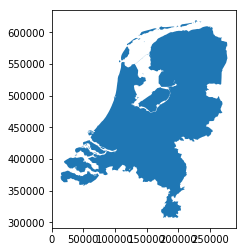

In [67]:
nederland.plot()

5.5 x 4.7

In [68]:
nederland.crs

{'ellps': 'bessel',
 'k': 0.9999079,
 'lat_0': 52.15616055555555,
 'lon_0': 5.38763888888889,
 'no_defs': True,
 'proj': 'sterea',
 'units': 'm',
 'x_0': 155000,
 'y_0': 463000}

In [69]:
nederland = nederland.to_crs({'init' : 'epsg:4326'})

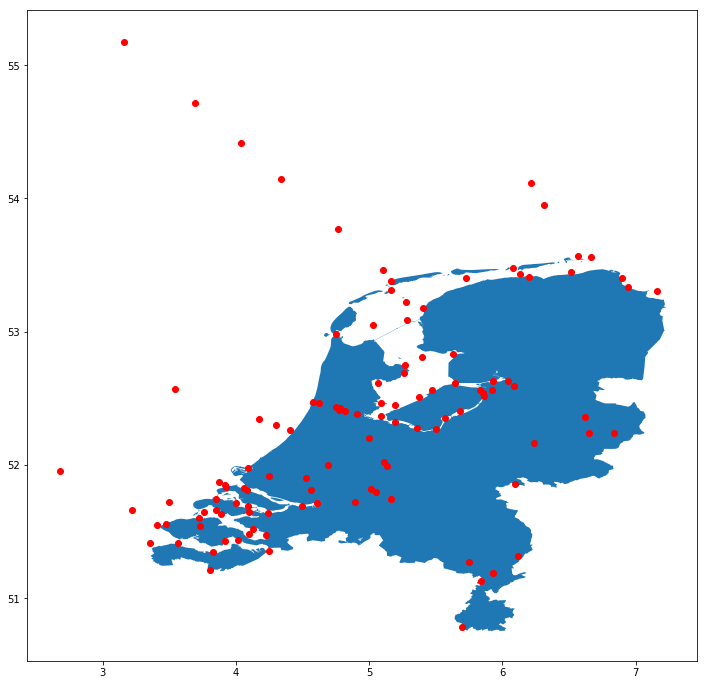

In [70]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
nederland.plot(ax=ax)
# Add locations
all_locations.plot(ax=ax, color='red', legend=True)

In [71]:
all_locations.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
8609   NOORDWK20                  10                       E50    4103000   
8625   NOORDWK10                  10                       E50    4180900   
8641    NOORDWK2                  10                       E50    4242200   
75226   BUITHVN8                  10                        RD   10020600   
81227    MARSDND                  10                        RD   11220000   

       locatie_Y     plt_X     plt_Y         locatie_omschrijving  \
8609    52203000   4103000  52203000  Noordwijk 20 km uit de kust   
8625    52180800   4180900  52180800  Noordwijk 10 km uit de kust   
8641    52154100   4242200  52154100   Noordwijk 2 km uit de kust   
75226   49814300  10020600  49814300                Buitenhaven 8   
81227   55525000  11220000  55525000               Marsdiep noord   

      compartiments_code_omschrijving        gebieds_code_omschrijving  \
8609                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8625                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8641                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
75226                Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
81227                Oppervlaktewater                   Waddenzee west   

           X_RD      Y_RD     X_WGS     Y_WGS  \
8609    72374.0  484329.0  4.174743  52.34066   
8625    80995.0  479803.0  4.302219  52.30122   
8641    88000.0  475160.0  4.405826  52.26039   
75226  100206.0  498143.0  4.580848  52.46828   
81227  112200.0  555250.0  4.749934  52.98254   

                                 geometry  
8609            POINT (4.174743 52.34066)  
8625            POINT (4.302219 52.30122)  
8641            POINT (4.405826 52.26039)  
75226  POINT (4.580848 52.46828000000001)  
81227           POINT (4.749934 52.98254)

In [72]:
all_locations.crs

{'init': 'epsg:4326'}

In [73]:
all_locations.head()

locatie  compartiments_code locatie_coordinaten_soort  locatie_X  \
8609   NOORDWK20                  10                       E50    4103000   
8625   NOORDWK10                  10                       E50    4180900   
8641    NOORDWK2                  10                       E50    4242200   
75226   BUITHVN8                  10                        RD   10020600   
81227    MARSDND                  10                        RD   11220000   

       locatie_Y     plt_X     plt_Y         locatie_omschrijving  \
8609    52203000   4103000  52203000  Noordwijk 20 km uit de kust   
8625    52180800   4180900  52180800  Noordwijk 10 km uit de kust   
8641    52154100   4242200  52154100   Noordwijk 2 km uit de kust   
75226   49814300  10020600  49814300                Buitenhaven 8   
81227   55525000  11220000  55525000               Marsdiep noord   

      compartiments_code_omschrijving        gebieds_code_omschrijving  \
8609                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8625                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
8641                 Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
75226                Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
81227                Oppervlaktewater                   Waddenzee west   

           X_RD      Y_RD     X_WGS     Y_WGS  \
8609    72374.0  484329.0  4.174743  52.34066   
8625    80995.0  479803.0  4.302219  52.30122   
8641    88000.0  475160.0  4.405826  52.26039   
75226  100206.0  498143.0  4.580848  52.46828   
81227  112200.0  555250.0  4.749934  52.98254   

                                 geometry  
8609            POINT (4.174743 52.34066)  
8625            POINT (4.302219 52.30122)  
8641            POINT (4.405826 52.26039)  
75226  POINT (4.580848 52.46828000000001)  
81227           POINT (4.749934 52.98254)

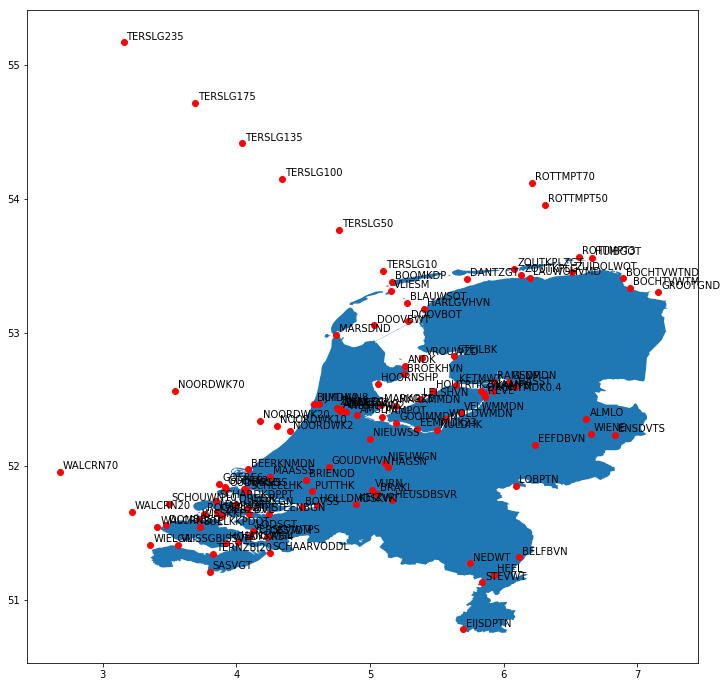

In [74]:
fig, ax = plt.subplots(figsize=(12*1.17,12), subplot_kw={'aspect':'equal'})
nederland.plot(ax=ax)
# Add locations
all_locations.plot(ax=ax, color='red')

for x, y, label in zip(all_locations.geometry.x, all_locations.geometry.y, all_locations.locatie):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [75]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [76]:
#os.chdir('../../code')
os.getcwd()

'C:\\Users\\Jan Schoonbrood\\Homework\\project-rws\\code'

In [77]:
#Writing geodataframe to shapefile
os.chdir('../data/geodataframes')
all_locations.to_file(driver = 'ESRI Shapefile', filename= "all_locations.shp")

In [78]:
#Testing
test = gpd.read_file('all_locations.shp')

In [79]:
test.head()

locatie  compartime locatie_co  locatie_X  locatie_Y     plt_X     plt_Y  \
0  NOORDWK20          10        E50    4103000   52203000   4103000  52203000   
1  NOORDWK10          10        E50    4180900   52180800   4180900  52180800   
2   NOORDWK2          10        E50    4242200   52154100   4242200  52154100   
3   BUITHVN8          10         RD   10020600   49814300  10020600  49814300   
4    MARSDND          10         RD   11220000   55525000  11220000  55525000   

                    locatie_om        comparti_1  \
0  Noordwijk 20 km uit de kust  Oppervlaktewater   
1  Noordwijk 10 km uit de kust  Oppervlaktewater   
2   Noordwijk 2 km uit de kust  Oppervlaktewater   
3                Buitenhaven 8  Oppervlaktewater   
4               Marsdiep noord  Oppervlaktewater   

                        gebieds_co      X_RD      Y_RD     X_WGS     Y_WGS  \
0  Hollandse kust  (Kustzone, NCP)   72374.0  484329.0  4.174743  52.34066   
1  Hollandse kust  (Kustzone, NCP)   80995.0  479803.0  4.302219  52.30122   
2  Hollandse kust  (Kustzone, NCP)   88000.0  475160.0  4.405826  52.26039   
3  Hollandse kust  (Kustzone, NCP)  100206.0  498143.0  4.580848  52.46828   
4                   Waddenzee west  112200.0  555250.0  4.749934  52.98254   

                             geometry  
0           POINT (4.174743 52.34066)  
1           POINT (4.302219 52.30122)  
2           POINT (4.405826 52.26039)  
3  POINT (4.580848 52.46828000000001)  
4           POINT (4.749934 52.98254)

In [80]:
os.chdir('../../code')